## Evaluating Marketing Channels for FoodFusion Campaigning Data

The FoodFusion Marketing Campaign Data is a simulated dataset created to provide a realistic scenario for analyzing marketing campaigns. It contains information about users who received marketing messages from FoodFusion, a meal kit delivery service, across various channels. This project focuses on evaluating the effectiveness of these marketing channels in driving user subscription and retention. By exploring subscription and retention analysis, segmentation, and other aspects of marketing data science, the goal is to identify the most effective channels for customer acquisition and retention. Ultimately, the project aims to provide data-driven insights to optimize FoodFusion's marketing strategies.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [86]:
data = pd.read_csv("foodfusion_marketing_london.csv", sep=',')

In [87]:
data.head(5)

,user_id,date_served,subscribing_channel,converted,is_retained,dietary_preference,meal_type,location,age_group
0,1,2023-06-13,Email,True,False,Vegetarian,Lunch,Greenwich,46+ years
1,2,2023-01-27,Influencers,True,False,Vegan,Breakfast,Camden,19-24 years
2,3,2023-03-01,House Ads,True,True,Omnivore,Snack,Greenwich,31-36 years
3,4,2023-05-31,Instagram,True,True,Keto,Dinner,Hackney,19-24 years
4,5,2023-02-25,Instagram,True,True,Keto,Breakfast,Hackney,25-30 years


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10000 non-null  int64 
 1   date_served          10000 non-null  object
 2   subscribing_channel  10000 non-null  object
 3   converted            10000 non-null  bool  
 4   is_retained          10000 non-null  bool  
 5   dietary_preference   10000 non-null  object
 6   meal_type            10000 non-null  object
 7   location             10000 non-null  object
 8   age_group            10000 non-null  object
dtypes: bool(2), int64(1), object(6)
memory usage: 566.5+ KB


The columns in the dataset are as follows:

1) user_id: A unique identifier for each user.

2) date_served: The date on which the marketing message was served to the user.

3) subscribing_channel: The marketing channel through which the user subscribed (e.g., Email, Facebook, Instagram, Push Notifications, House Ads, Influencers).

4) converted: A boolean value indicating whether the user subscribed after receiving the marketing message (True if subscribed, False otherwise).

5) is_retained: A boolean value indicating if the user was retained after subscribing, based on a one-month retention period (True if retained, False if not).

6) dietary_preference: The dietary preference of the user (e.g., Vegan, Vegetarian, Gluten-Free, Keto, Omnivore).

7) meal_type: The preferred meal kit type of the user (e.g., Breakfast, Lunch, Dinner, Snack).

8) location: The borough in London where the user is located (e.g., Camden, Greenwich, Hackney, Hammersmith and Fulham, Islington).

9) age_group: The age group of the user (e.g., 0-18 years, 19-24 years, 25-30 years, 31-36 years, 37-45 years, 46+ years).

In [89]:
data['date_served'] = pd.to_datetime(data['date_served'], errors='coerce')
data['month'] = data['date_served'].dt.month
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June'}
data['month_name'] = data['month'].map(month_mapping)

### 1. Analysing Subscription Rate across marketing channels

#### 1.a) What is the overall subscription rate in the dataset?

In [90]:
overall_subscription_rate = data['converted'].mean()
print(f"Overall Subscription Rate: {overall_subscription_rate * 100:.2f}%")

Overall Subscription Rate: 50.20%


#### 1.b) Subscription rate across different marketing channels

In [91]:
channel_subscription = data.groupby('subscribing_channel')['converted'].mean() * 100
channel_susbcription = channel_subscription.apply(lambda x: f"{x:.2f}%")
print(channel_conversion)

subscribing_channel
Email          48.36%
Facebook       51.40%
House Ads      51.29%
Influencers    48.52%
Instagram      51.64%
Push           50.00%
Name: converted, dtype: object


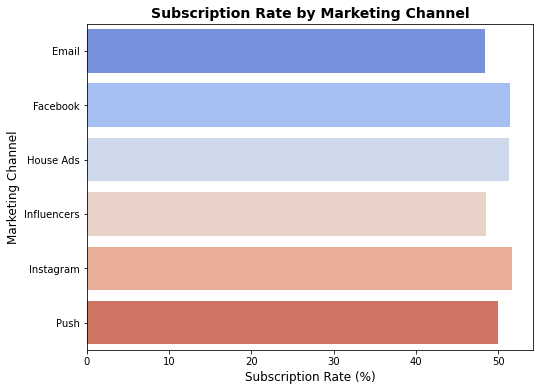

In [92]:
channel_subscription_rate = data.groupby('subscribing_channel')['converted'].mean() * 100
channel_subscription_rate_df = channel_subscription_rate.reset_index()
channel_subscription_rate_df.rename(columns={'converted': 'conversion_rate'}, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=channel_subscription_rate_df, 
    x='conversion_rate', 
    y='subscribing_channel', 
    palette='coolwarm'
)
plt.title("Subscription Rate by Marketing Channel", fontsize=14, fontweight='bold')
plt.xlabel("Subscription Rate (%)", fontsize=12)
plt.ylabel("Marketing Channel", fontsize=12)
plt.show()

#### 1.c) Is there a significant difference in subscription rates between the channels?

In [93]:
contingency_table = pd.crosstab(data['subscribing_channel'], data['converted'])

print("Contingency Table:")
print(contingency_table)

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-Squared Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_value:.4f}")


if p_value < 0.05:
    print("\nThere is a significant association between marketing channels and subscription rates (p < 0.05).")
else:
    print("\nThere is no significant association between marketing channels and subscription rates (p >= 0.05).")


Contingency Table:
converted            False  True
subscribing_channel             
Email                  868   813
Facebook               816   863
House Ads              809   852
Influencers            853   804
Instagram              798   852
Push                   836   836

Chi-Squared Statistic: 7.2848
Degrees of Freedom: 5
P-value: 0.2003

There is no significant association between marketing channels and subscription rates (p >= 0.05).


#### 1.d) How does the subscription rate vary across the months?

Number of Subscribers for Each Month:
January: 835
February: 767
March: 856
April: 823
May: 873
June: 866


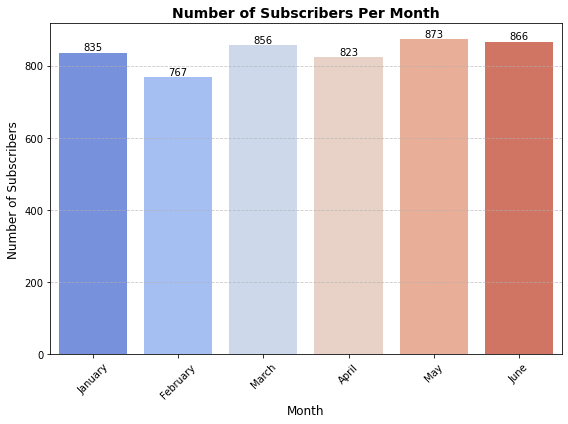

In [94]:
monthly_subscribers = data[data['converted']].groupby('month_name').size()
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June']
monthly_subscribers = monthly_subscribers.reindex(ordered_months)
monthly_subscribers = monthly_subscribers.reset_index()
monthly_subscribers.rename(columns={0: 'subscriber_count', 'month_name': 'month'}, inplace=True)


print("Number of Subscribers for Each Month:")
for index, row in monthly_subscribers.iterrows():
    print(f"{row['month']}: {row['subscriber_count']}")

plt.figure(figsize=(8, 6))
sns.barplot(x='month', y='subscriber_count', data=monthly_subscribers, palette='coolwarm')

for index, row in monthly_subscribers.iterrows():
    plt.text(index, row['subscriber_count'] + 1, str(row['subscriber_count']),
             ha='center', va='bottom', fontsize=10, color='black')

plt.title("Number of Subscribers Per Month", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Subscribers", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Findings:**

- The overall subscription rate is 50.20%, indicating that about half of the users who received marketing messages converted to subscriptions.
- Subscription rates across different marketing channels vary slightly, with Instagram having the highest rate (51.64%) and Email the lowest (48.36%).
- A Chi-squared test revealed no significant association between marketing channels and subscription rates (p = 0.2003), suggesting that the channel used does not strongly influence the likelihood of subscription.
- Subscription rates fluctuate across months, with the highest number of subscribers in June (866) and the lowest in February (767).

### 2. Analysing Retention Rate across marketing channels

#### 2.a) What is the overall retention rate, and how does the retention rate differ for each marketing channel?

In [95]:
total_users = data['user_id'].nunique()
converted_users = data[data['converted'] == True]['user_id'].nunique()
retained_users = data[data['is_retained'] == True]['user_id'].nunique()

overall_retention_rate = retained_users / converted_users
print(f"Overall Retention Rate: {overall_retention_rate * 100:.2f}%")

channel_retention_data = data[data['converted'] == True].groupby('subscribing_channel').agg(
    converted_users=('user_id', 'nunique'),  
    retained_users=('is_retained', 'sum')   
).reset_index()

channel_retention_data['retention_rate'] = channel_retention_data['retained_users'] / channel_retention_data['converted_users']
print("\nRetention Rate by Marketing Channel:")
print(channel_retention_data[['subscribing_channel', 'retention_rate']])


Overall Retention Rate: 49.32%

Retention Rate by Marketing Channel:
  subscribing_channel  retention_rate
0               Email        0.468635
1            Facebook        0.497103
2           House Ads        0.523474
3         Influencers        0.504975
4           Instagram        0.487089
5                Push        0.477273


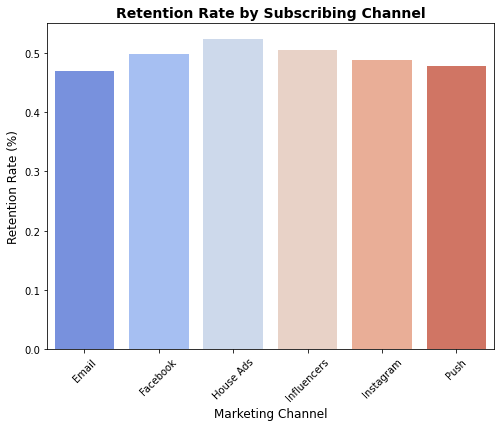

In [96]:
plt.figure(figsize=(8, 6))
sns.barplot(x='subscribing_channel', y='retention_rate', data=channel_retention_data, palette='coolwarm')
plt.title("Retention Rate by Subscribing Channel", fontsize=14, fontweight='bold')
plt.xlabel("Marketing Channel", fontsize=12)
plt.ylabel("Retention Rate (%)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### 2.b) Is there a significant difference in retention rates between the channels?

In [97]:
contingency_table = pd.crosstab(data['subscribing_channel'], data['is_retained'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-Squared Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("\nThere is a significant difference in retention rates between marketing channels (p < 0.05).")
else:
    print("\nThere is no significant difference in retention rates between marketing channels (p >= 0.05).")



Chi-Squared Statistic: 9.3393
P-value: 0.0963

There is no significant difference in retention rates between marketing channels (p >= 0.05).


**Findings:**

- The overall retention rate is 49.32%, indicating that almost half of the users who subscribed remained active after the trial period.
- Retention rates vary across marketing channels, with House Ads having the highest retention rate (52.35%) and Email the lowest (46.86%).
- A Chi-squared test showed no significant difference in retention rates between the marketing channels (p = 0.0963), suggesting that the channel through which users were acquired does not significantly impact their likelihood of retention.

### 3. Subscription and retention rates by age group, meal type and dietary preferences

In [98]:
subscription_by_age = data.groupby('age_group')['converted'].mean() * 100
subscription_by_meal = data.groupby('meal_type')['converted'].mean() * 100
subscription_by_diet = data.groupby('dietary_preference')['converted'].mean() * 100

retention_by_age = data[data['converted']].groupby('age_group')['is_retained'].mean() * 100
retention_by_meal = data[data['converted']].groupby('meal_type')['is_retained'].mean() * 100
retention_by_diet = data[data['converted']].groupby('dietary_preference')['is_retained'].mean() * 100

print("Subscription Rate by Age Group:")
print(subscription_by_age.apply(lambda x: f"{x:.2f}%"))

print("\nSubscription Rate by Meal Type:")
print(subscription_by_meal.apply(lambda x: f"{x:.2f}%"))

print("\nSubscription Rate by Dietary Preference:")
print(subscription_by_diet.apply(lambda x: f"{x:.2f}%"))

print("\nRetention Rate by Age Group:")
print(retention_by_age.apply(lambda x: f"{x:.2f}%"))

print("\nRetention Rate by Meal Type:")
print(retention_by_meal.apply(lambda x: f"{x:.2f}%"))

print("\nRetention Rate by Dietary Preference:")
print(retention_by_diet.apply(lambda x: f"{x:.2f}%"))


Subscription Rate by Age Group:
age_group
0-18 years     51.35%
19-24 years    49.09%
25-30 years    49.19%
31-36 years    50.27%
37-45 years    50.27%
46+ years      51.02%
Name: converted, dtype: object

Subscription Rate by Meal Type:
meal_type
Breakfast    51.17%
Dinner       50.41%
Lunch        49.84%
Snack        49.42%
Name: converted, dtype: object

Subscription Rate by Dietary Preference:
dietary_preference
Gluten-Free    49.88%
Keto           50.83%
Omnivore       50.10%
Vegan          50.35%
Vegetarian     49.82%
Name: converted, dtype: object

Retention Rate by Age Group:
age_group
0-18 years     47.61%
19-24 years    49.19%
25-30 years    50.73%
31-36 years    49.94%
37-45 years    50.90%
46+ years      47.64%
Name: is_retained, dtype: object

Retention Rate by Meal Type:
meal_type
Breakfast    50.28%
Dinner       49.77%
Lunch        49.92%
Snack        47.36%
Name: is_retained, dtype: object

Retention Rate by Dietary Preference:
dietary_preference
Gluten-Free    51.90%
K

**Findings:** The subscription rate shows little variation across age groups, with the highest rate in the 0-18 years group (51.35%) and the lowest in the 19-24 years group (49.09%). Meal type preferences reveal a slightly higher subscription rate for Breakfast (51.17%), while Snack had the lowest (49.42%). Subscription rates across dietary preferences are fairly similar, with Keto having the highest at 50.83%. In terms of retention, the 37-45 years age group had the highest retention rate (50.90%), while the 46+ years group had the lowest (47.64%). Keto users had the lowest retention rate at 46.83%.

### 4. How do users acquired through influencers differ from users acquired through other channels?

In [99]:
influencer_data = data[data['subscribing_channel'] == 'Influencers']
other_channels_data = data[data['subscribing_channel'] != 'Influencers']

influencer_subscription_rate = influencer_data['converted'].mean() * 100
other_channels_subscription_rate = other_channels_data['converted'].mean() * 100

influencer_retention_rate = influencer_data[influencer_data['converted']]['is_retained'].mean() * 100
other_channels_retention_rate = other_channels_data[other_channels_data['converted']]['is_retained'].mean() * 100

influencer_dietary = influencer_data['dietary_preference'].value_counts(normalize=True) * 100
other_channels_dietary = other_channels_data['dietary_preference'].value_counts(normalize=True) * 100

influencer_meal_type = influencer_data['meal_type'].value_counts(normalize=True) * 100
other_channels_meal_type = other_channels_data['meal_type'].value_counts(normalize=True) * 100

influencer_age_group = influencer_data['age_group'].value_counts(normalize=True) * 100
other_channels_age_group = other_channels_data['age_group'].value_counts(normalize=True) * 100

print(f"Influencer Subscription Rate: {influencer_subscription_rate:.2f}%")
print(f"Other Channels Subscription Rate: {other_channels_subscription_rate:.2f}%")

print(f"Influencer Retention Rate: {influencer_retention_rate:.2f}%")
print(f"Other Channels Retention Rate: {other_channels_retention_rate:.2f}%")

print("\nInfluencer Dietary Preferences:")
print(influencer_dietary.apply(lambda x: f"{x:.2f}%"))

print("\nOther Channels Dietary Preferences:")
print(other_channels_dietary.apply(lambda x: f"{x:.2f}%"))

print("\nInfluencer Meal Types:")
print(influencer_meal_type.apply(lambda x: f"{x:.2f}%"))

print("\nOther Channels Meal Types:")
print(other_channels_meal_type.apply(lambda x: f"{x:.2f}%"))

print("\nInfluencer Age Groups:")
print(influencer_age_group.apply(lambda x: f"{x:.2f}%"))

print("\nOther Channels Age Groups:")
print(other_channels_age_group.apply(lambda x: f"{x:.2f}%"))


Influencer Subscription Rate: 48.52%
Other Channels Subscription Rate: 50.53%
Influencer Retention Rate: 50.50%
Other Channels Retention Rate: 49.10%

Influencer Dietary Preferences:
Keto           21.12%
Vegan          20.76%
Gluten-Free    20.58%
Omnivore       18.89%
Vegetarian     18.65%
Name: dietary_preference, dtype: object

Other Channels Dietary Preferences:
Keto           20.38%
Vegetarian     20.04%
Vegan          19.99%
Gluten-Free    19.90%
Omnivore       19.69%
Name: dietary_preference, dtype: object

Influencer Meal Types:
Snack        26.92%
Dinner       25.77%
Breakfast    23.84%
Lunch        23.48%
Name: meal_type, dtype: object

Other Channels Meal Types:
Snack        25.48%
Dinner       25.36%
Lunch        24.68%
Breakfast    24.48%
Name: meal_type, dtype: object

Influencer Age Groups:
19-24 years    18.04%
37-45 years    18.04%
0-18 years     16.23%
25-30 years    16.05%
46+ years      15.81%
31-36 years    15.81%
Name: age_group, dtype: object

Other Channels Age

**Findings:**

- Subscription Rate: Users acquired through influencers have a slightly lower subscription rate (48.52%) compared to those acquired through other channels (50.53%).
- Retention Rate: Influencer-acquired users have a higher retention rate (50.50%) than those from other channels (49.10%).
- Dietary Preferences: Influencer-acquired users show a higher preference for Keto (21.12%) and Vegan (20.76%) diets compared to other channels, where Keto (20.38%) and Vegetarian (20.04%) are more popular.
- Meal Type: Both groups prefer Snack and Dinner, though influencer-acquired users have a slightly higher preference for Snack (26.92%).
- Age Groups: Influencer-acquired users are more evenly distributed across age groups, with notable concentrations in 19-24 years and 37-45 years.

### 5. What are the key factors influencing subscription and retention rates?

Correlation Matrix:
           age_group     month  meal_type
age_group   1.000000 -0.017186   0.001547
month      -0.017186  1.000000   0.007212
meal_type   0.001547  0.007212   1.000000


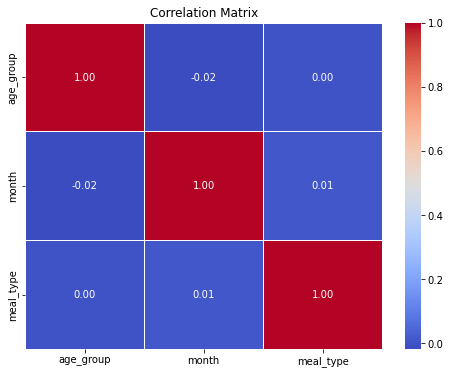

In [100]:
correlation_data = data[['age_group', 'month', 'meal_type']].copy()

correlation_data['age_group'] = correlation_data['age_group'].astype('category').cat.codes
correlation_data['meal_type'] = correlation_data['meal_type'].astype('category').cat.codes

correlation_matrix = correlation_data.corr()


print("Correlation Matrix:")
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [101]:
import statsmodels.api as sm


X = pd.get_dummies(data[['subscribing_channel', 'age_group', 'meal_type', 'dietary_preference', 'location']], drop_first=True)
y = data['converted']


X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()


print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.692438
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9978
Method:                           MLE   Df Model:                           21
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                0.001012
Time:                        23:57:18   Log-Likelihood:                -6924.4
converged:                       True   LL-Null:                       -6931.4
Covariance Type:            nonrobust   LLR p-value:                    0.8682
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0180      0.094     -0.191  

In [102]:
X_retention = pd.get_dummies(data[data['converted']][['subscribing_channel', 'age_group', 'meal_type', 'dietary_preference', 'location']], drop_first=True)
y_retention = data[data['converted']]['is_retained']

X_retention = sm.add_constant(X_retention)


logit_model_retention = sm.Logit(y_retention, X_retention)
logit_result_retention = logit_model_retention.fit()

print(logit_result_retention.summary())


Optimization terminated successfully.
         Current function value: 0.690617
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            is_retained   No. Observations:                 5020
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                           21
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                0.003518
Time:                        23:57:18   Log-Likelihood:                -3466.9
converged:                       True   LL-Null:                       -3479.1
Covariance Type:            nonrobust   LLR p-value:                    0.2704
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0791      0.133     -0.596  

**Findings:**

- **Subscription Rate:**
 - Marketing channels, particularly Instagram and Facebook, exhibit a positive but marginally significant impact on subscription rates.
 - House Ads also show a positive effect, though not statistically significant.
 - Age group, meal type, dietary preferences, and location do not significantly influence subscription likelihood.
- **Retention Rate:**
 - House Ads significantly influence retention, suggesting higher retention for users acquired through this channel.
 - Users with Keto dietary preferences are significantly less likely to be retained.
 - Vegan preferences show a borderline negative effect on retention.
 - Age group, meal type, and location do not have a significant impact on retention.

##### Business Recommendations


1. **Targeted Campaigns for Dietary Preferences:** There is a clear preference for Keto and Vegan options among subscribers, particularly for users acquired through influencers. Focused marketing campaigns promoting these meal types can increase subscriptions in months like March and June, where Keto and Vegan options are performing well. Conversely, promoting Vegan and Vegetarian options during slower months, such as February and April, may boost engagement during these periods.

2. **Meal Type Promotions:** Breakfast and Lunch meal types show higher subscription rates, likely due to their convenience. Expanding the variety of these meals and offering tailored promotions could further drive both subscriptions and retention. Additionally, more engagement around Snack options, which show varied interest across all channels, could increase customer loyalty.

3. **Geographic Targeting:** Greenwich and Islington locations already show strong customer retention. Therefore, strengthening marketing efforts and introducing loyalty programs in these regions could further solidify customer loyalty and increase retention rates. These initiatives could be especially beneficial for regions with lower retention.

4. **Age-Specific Marketing:** Younger users (under 18) respond well to Email campaigns, which should be a primary channel for targeting this demographic. For users aged 31-36, Facebook is the most effective platform, while House Ads work best with older users (46+). Instagram and Push notifications should focus on the 25-36 age group, especially for users aged 25-30 on Instagram and 31-36 years for Push notifications.

5. **Focus on Gluten-Free Options:** The strong demand for Gluten-Free options suggests an opportunity to expand product offerings for this segment. Introducing more flavours or variations could further improve retention and satisfaction, driving long-term customer loyalty.